## Case study: Wisconsin Hospitals
A nationwide survey of hospital costs conducted by the US Agency for Healthcare consists of hospital records of inpatient samples. The given data is restricted to the city of Wisconsin and relates to patients in the age group 0-17 years. The agency wants to analyze the data to research on the healthcare costs and their utilization.
Here,I have performed the data cleaning, Extrapolatory Data Analysis and the predictive analysis using linear regression to identify, and predict the insights related to Patients and Hospitals. 
Data source: "http://instruction.bus.wisc.edu/jfrees/jfreesbooks/Regression%20Modeling/BookWebDec2010/data.html". 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)
#import libraries for metrics and reports:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('healthcare.csv')
df.head(5)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [3]:
#Lets make 'FEMALE' to 'GENDER' for understanding purpose:
data=df.rename(columns={'FEMALE':'GENDER'})
data

,AGE,GENDER,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [4]:
# OR:
pd.options.display.max_rows=None
data

,AGE,GENDER,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
5,17,0,0,1.0,3305,347
6,17,1,4,1.0,2205,754
7,16,1,2,1.0,1167,754
8,16,1,1,1.0,532,753
9,17,1,2,1.0,1363,758


In [5]:
data.describe()

,AGE,GENDER,LOS,RACE,TOTCHG,APRDRG
count,500.000000,500.000000,500.000000,499.000000,500.000000,500.000000
mean,5.086000,0.512000,2.828000,1.078156,2774.388000,616.360000
std,6.949474,0.500357,3.363487,0.514746,3888.407367,178.316044
min,0.000000,0.000000,0.000000,1.000000,532.000000,21.000000
25%,0.000000,0.000000,2.000000,1.000000,1216.250000,640.000000
50%,0.000000,1.000000,2.000000,1.000000,1536.500000,640.000000
75%,13.000000,1.000000,3.000000,1.000000,2530.250000,751.000000
max,17.000000,1.000000,41.000000,6.000000,48388.000000,952.000000


In [6]:
data.shape

(500, 6)

In [7]:
data.info

<bound method DataFrame.info of      AGE  GENDER  LOS  RACE  TOTCHG  APRDRG
0     17       1    2   1.0    2660     560
1     17       0    2   1.0    1689     753
2     17       1    7   1.0   20060     930
3     17       1    1   1.0     736     758
4     17       1    1   1.0    1194     754
5     17       0    0   1.0    3305     347
6     17       1    4   1.0    2205     754
7     16       1    2   1.0    1167     754
8     16       1    1   1.0     532     753
9     17       1    2   1.0    1363     758
10    17       1    2   1.0    1245     758
11    15       0    2   1.0    1656     753
12    15       1    2   1.0    1379     751
13    15       1    4   1.0    2346     758
14    15       1    7   1.0    4006     753
15    15       1    4   1.0    2181     758
16    14       1    1   1.0     628     754
17    14       1    4   1.0    2463     758
18    15       1    3   1.0    1956     753
19    14       1    3   1.0    1802     758
20    13       1    1   1.0    3188     812


In [8]:
# Checking missing values:
data.isnull().sum()

AGE       0
GENDER    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

In [9]:
data['RACE'].unique()

array([ 1.,  4.,  6.,  2.,  5., nan,  3.])

In [10]:
data['RACE'].mode()

0    1.0
dtype: float64

In [11]:
# Filling missing 'Race' values with mode:
data['RACE']=data['RACE'].fillna(data['RACE'].mode()[0])

In [12]:
data.isnull().sum()

AGE       0
GENDER    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64

### Extrapolatory Data Analysis:

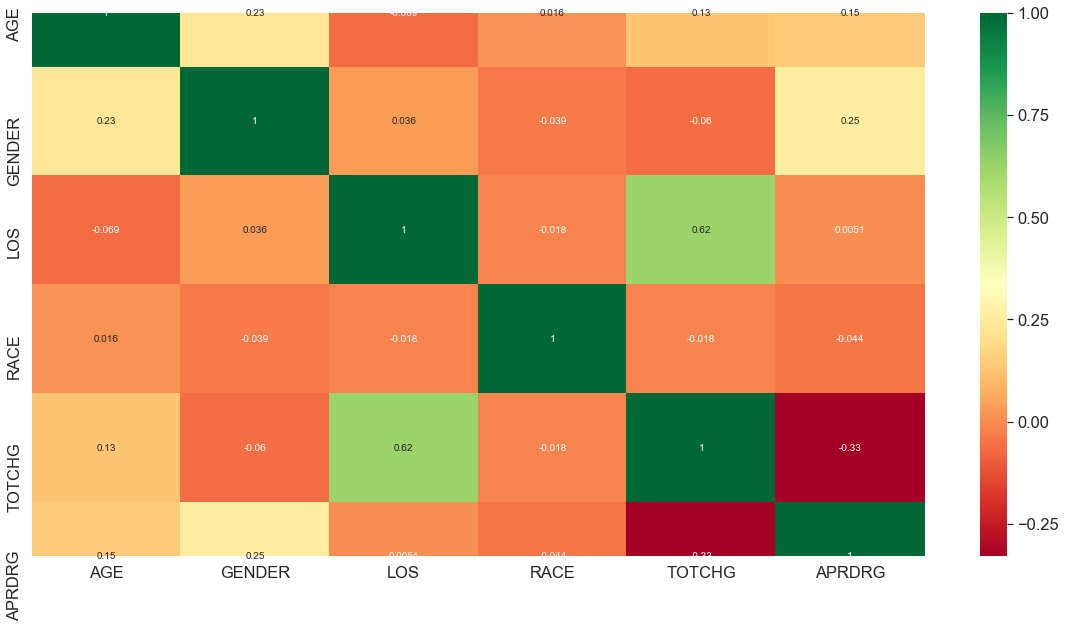

In [13]:
# Generating the correlation heat-map
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))
sns.heatmap( data[top_corr_features].corr(),annot=True,cmap="RdYlGn");

The above heatmap shows the correlation of LOS(Length of stay) with the total hospital cost.

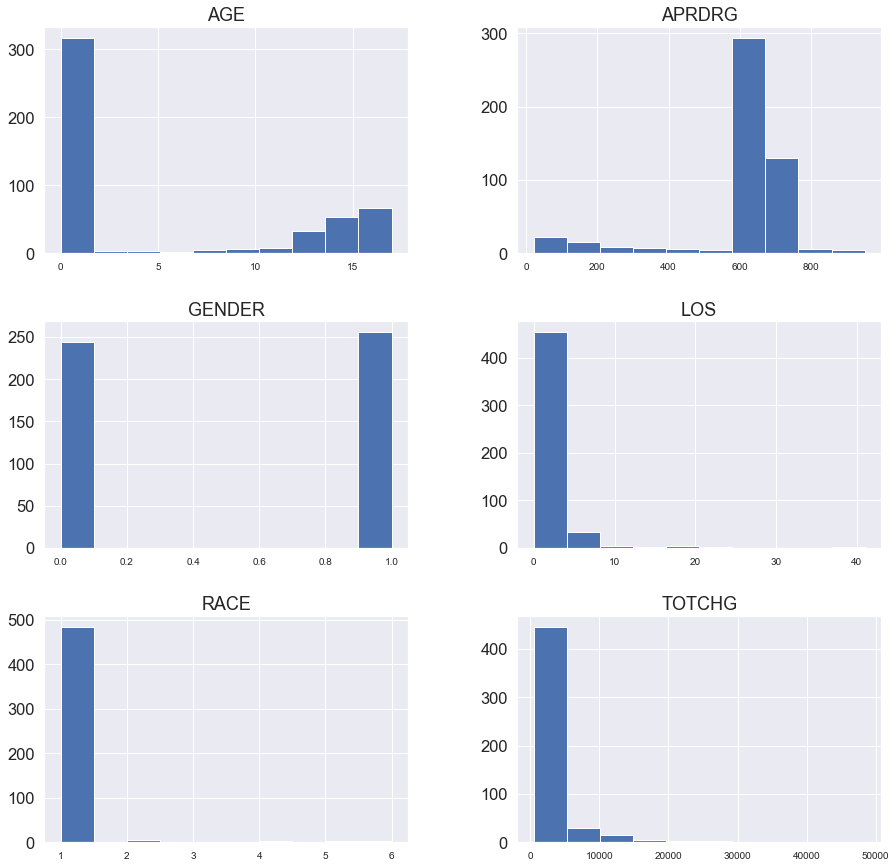

In [14]:
# Histograms:
data.hist(figsize=(15,15), xlabelsize = 10);

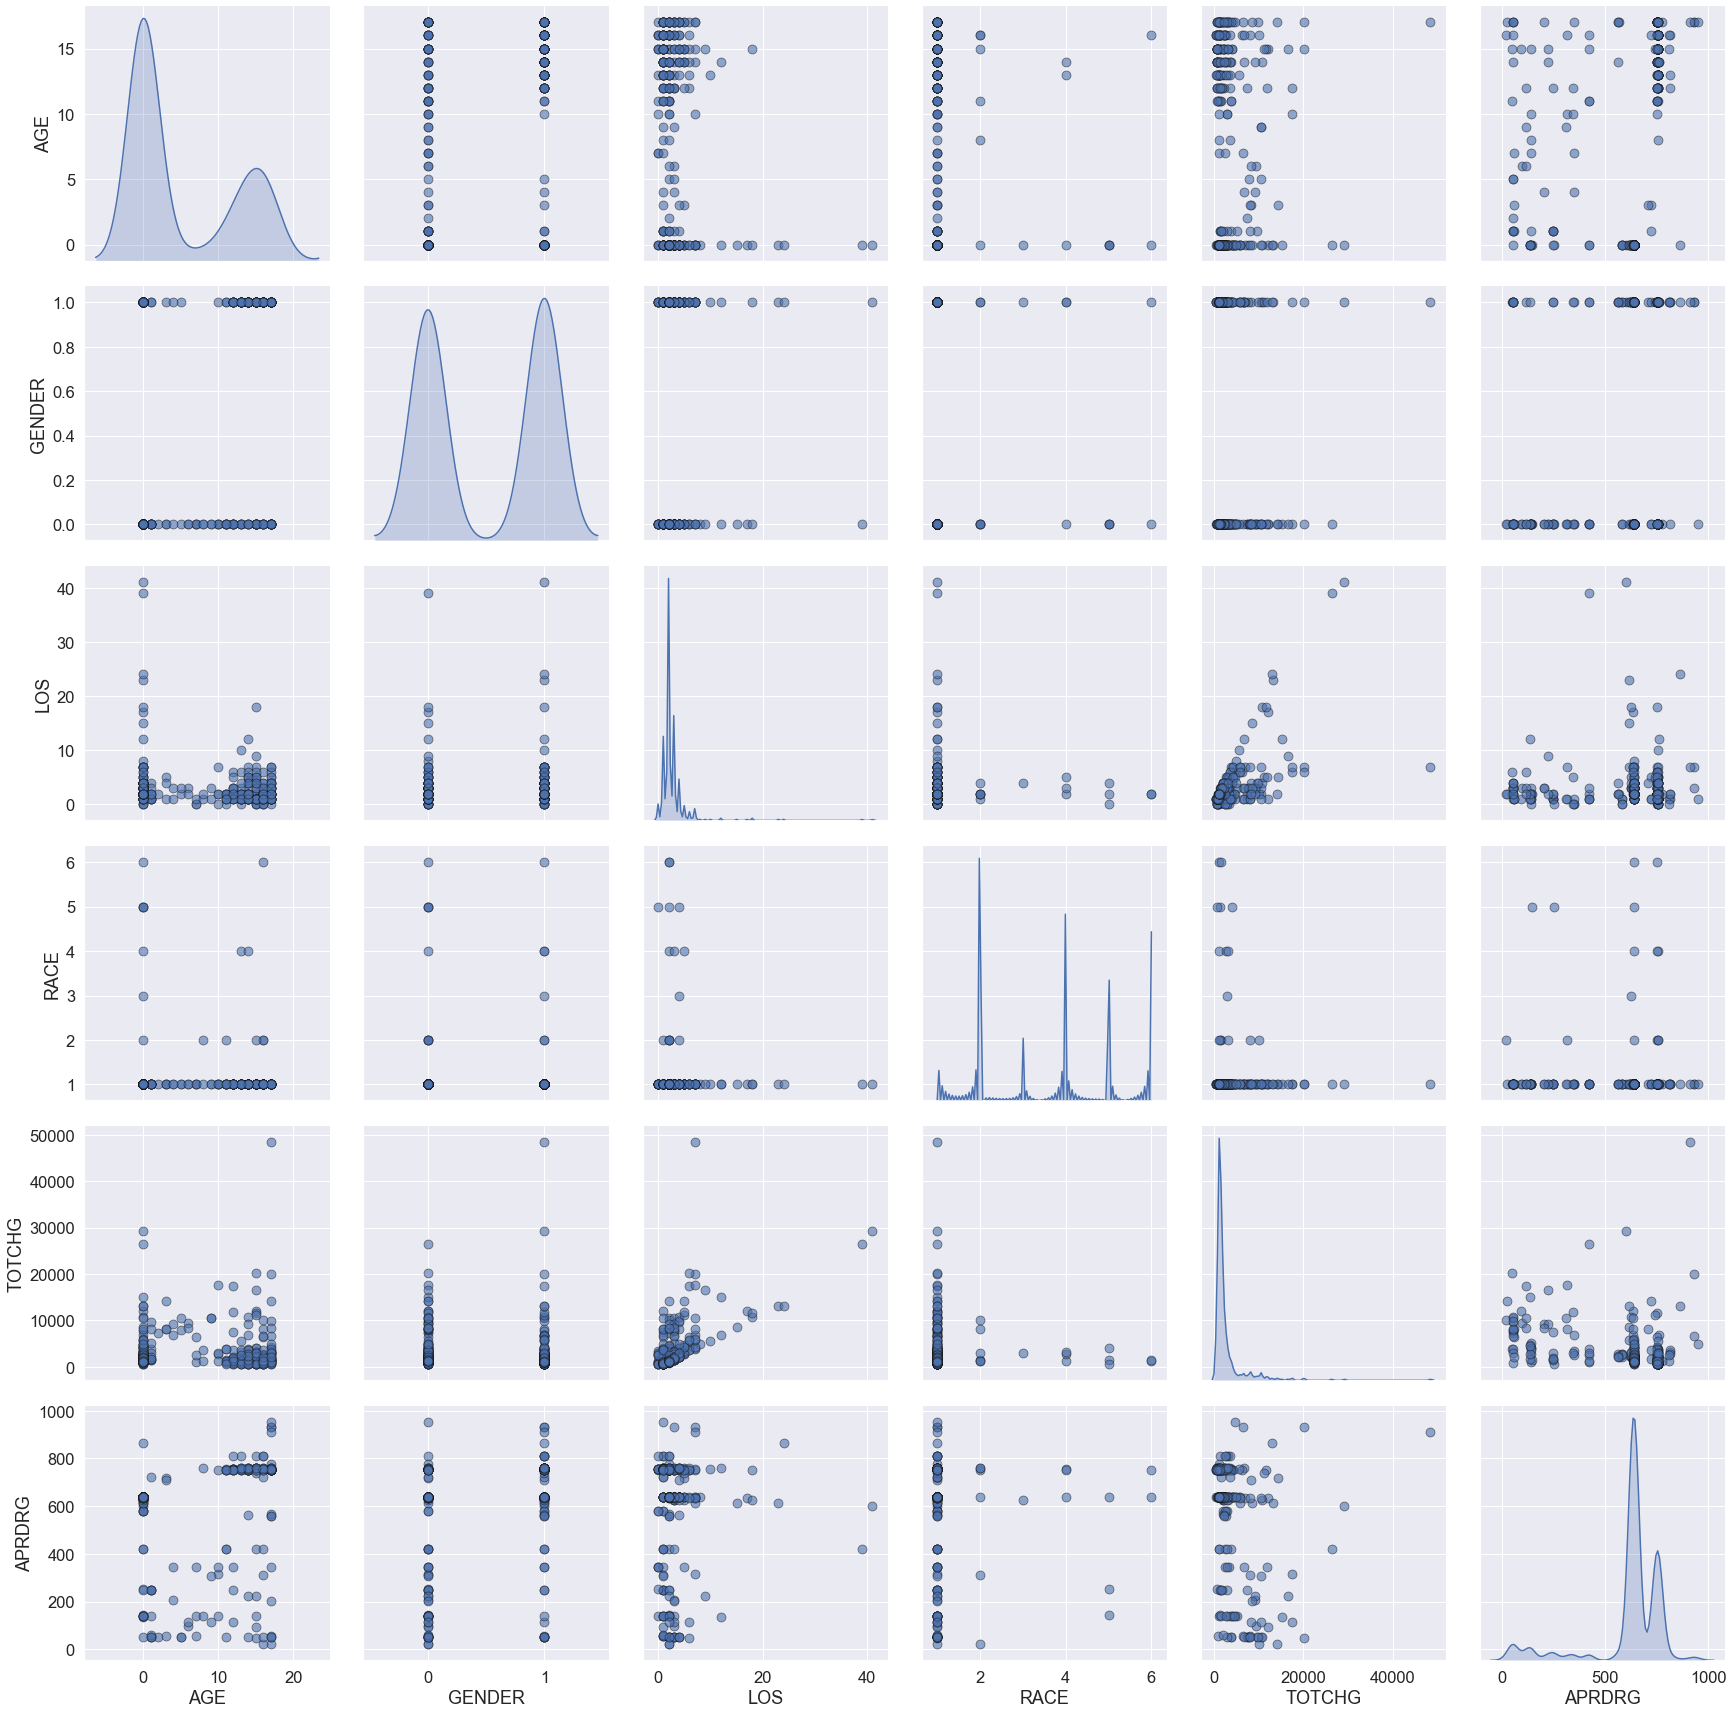

In [15]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, diag_kind='kde',plot_kws={'alpha':0.6,'s':80,'edgecolor':'k'},size=4)

Above scatter plots clearly demonstrate the linear relation of predictor variable 'LOS' with the response variable 'TOTCHG'.

In [16]:
# extract the data, into numpy array:
X_features =data.drop(['TOTCHG'],axis=1)
y_actual=data['TOTCHG']

In [17]:
X_features

,AGE,GENDER,LOS,RACE,APRDRG
0,17,1,2,1.0,560
1,17,0,2,1.0,753
2,17,1,7,1.0,930
3,17,1,1,1.0,758
4,17,1,1,1.0,754
5,17,0,0,1.0,347
6,17,1,4,1.0,754
7,16,1,2,1.0,754
8,16,1,1,1.0,753
9,17,1,2,1.0,758


In [18]:
# For each X_features, calculate VIF and save in dataframe
VIF = pd.DataFrame()

VIF["VIF_Factor"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]

VIF["feature"] = X_features.columns

In [19]:
VIF.sort_values(['VIF_Factor'], ascending=False).round(5)

,VIF_Factor,feature
4,5.64363,APRDRG
3,3.94919,RACE
1,2.29180,GENDER
2,1.65271,LOS
0,1.64833,AGE


We can keep all these variables as predictors for now since non of these have high VIF-Factors.

#### Age category of people who frequent the hospital:

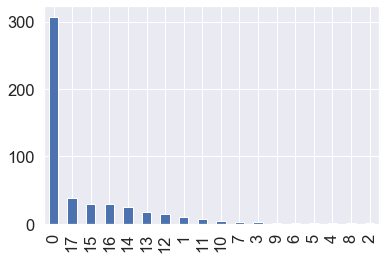

In [20]:
data['AGE'].value_counts().plot(kind='bar')

It can be clearly seen that most of the patients are newborn babies.

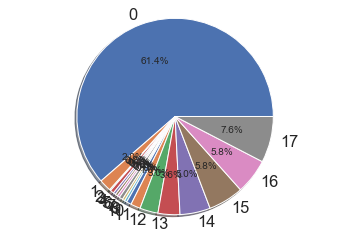

In [21]:
labels = data['AGE'].astype('category').cat.categories.tolist()
counts = data['AGE'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0, 0, 0,0,0)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

Above pie chart also shows that 61.4% patients are of Newborn age category, shows that most of the newly born babies are suffering from the deseases;therefore, frequent the hospital.

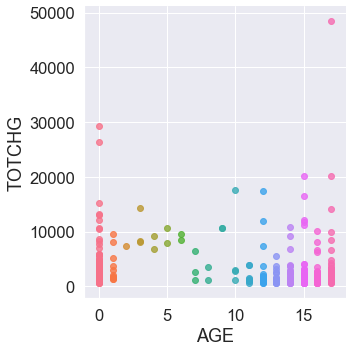

In [22]:
sns.lmplot( x="AGE", y="TOTCHG", data=data, fit_reg=False, hue='AGE', legend=False)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')
#sns.plt.show()


Above scatter plot shows that the age category of Newborn and teenager has the maximum expenditure. 

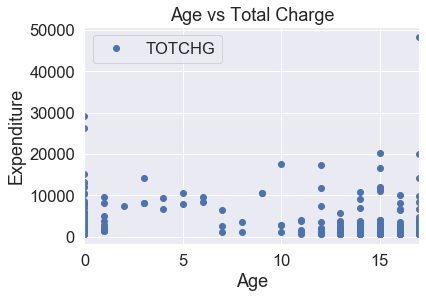

In [23]:
#OR:
data.plot(x='AGE', y='TOTCHG', style='o')  
plt.title('Age vs Total Charge')  
plt.xlabel('Age')  
plt.ylabel('Expenditure')  
plt.show()

#### Diagnosis related group that has maximum hospitalization and expenditure: 

In [24]:
APRDRG_max=data.groupby(['APRDRG'],sort=True)[['TOTCHG','LOS']].max(axis=1)
APRDRG_max.sample(10)

,TOTCHG,LOS
APRDRG,,
206,9230,3
560,2660,2
756,869,1
863,13040,24
143,1393,2
50,3908,2
57,8084,1
561,2296,4
317,17524,7


In [25]:
APRDRG_max.max()

TOTCHG    48388
LOS          41
dtype: int64

In [26]:
#OR
max_APRDRG = data.groupby('APRDRG').agg(
    {'TOTCHG':['max'],
     'LOS':['max']})
print(max_APRDRG.head(5))

       TOTCHG LOS
          max max
APRDRG           
21      10002   2
23      14174   2
49      20195   6
50       3908   2
51       3023   3


In [27]:
#OR:
def f(x):
    d = {}
    d['Expenditure'] = x['TOTCHG'].max()
    d['Length_Of_Stay'] = x['LOS'].max()
   
    return pd.Series(d, index=['Expenditure', 'Length_Of_Stay'])

data.groupby('APRDRG').apply(f)

,Expenditure,Length_Of_Stay
APRDRG,,
21,10002,2
23,14174,2
49,20195,6
50,3908,2
51,3023,3
53,10756,4
54,851,1
57,8084,1
58,2117,1


It is observed that the Diagnosis Related Group of 911 has the maximum expenditure.

In addition, the Diagnosis Related Group of 602 has the maximum hospitalization (LOS-Length Of Stay) at hospital.

#### Age group that has maximum hospitalization and expenditure:

In [28]:
AGE_max=data.groupby(['AGE'],sort=True)[['TOTCHG','LOS']].max(axis=1)
AGE_max

,TOTCHG,LOS
AGE,,
0,29188,41
1,9606,4
2,7298,2
3,14243,5
4,9230,3
5,10584,3
6,9530,3
7,6425,1
8,3588,2


In [29]:
AGE_max.max()

TOTCHG    48388
LOS          41
dtype: int64

 It is observed that the age group of 17 years old teenagers has the maximum expenditure.
 
 In addition, the age group of Newborn has the maximum hospitalization(LOS-Length Of Stay) at hospital; however,  has less expenditure as compared to those of 17 years old teenagers. The reason behind it could be the discount being offered by the hospital for the Newborn babies as compared to teenagers.



### Check if the RACE of the patient is related to the hospitalization costs.

Above correlation map shows the no any significant relation of the feature 'RACE' with the total expenditure. This means the race of the patient is not related to the hospitalization costs.
Lets further check it based on p-values.

In [30]:
# Extract further remaining data into numpy array:
X=data.drop(['TOTCHG'],axis=1)
y=data['TOTCHG']

In [31]:
X

,AGE,GENDER,LOS,RACE,APRDRG
0,17,1,2,1.0,560
1,17,0,2,1.0,753
2,17,1,7,1.0,930
3,17,1,1,1.0,758
4,17,1,1,1.0,754
5,17,0,0,1.0,347
6,17,1,4,1.0,754
7,16,1,2,1.0,754
8,16,1,1,1.0,753
9,17,1,2,1.0,758


In [32]:
y

0       2660
1       1689
2      20060
3        736
4       1194
5       3305
6       2205
7       1167
8        532
9       1363
10      1245
11      1656
12      1379
13      2346
14      4006
15      2181
16       628
17      2463
18      1956
19      1802
20      3188
21      2129
22      7421
23      1122
24      1173
25      3625
26      3908
27      3994
28      1033
29      2860
30      3814
31      1132
32      1163
33       610
34      9530
35      1268
36      2582
37      1287
38      6594
39       909
40      2530
41      1534
42     14243
43      1699
44      7298
45       636
46       626
47      3782
48      1444
49      1183
50      3045
51      3624
52      6810
53      1409
54      1211
55      9606
56      1411
57       607
58      2932
59      5075
60       762
61      6329
62      1226
63      8223
64      1193
65      1076
66     17434
67      1647
68      3865
69       628
70       806
71     29188
72      4717
73     15129
74      1085
75      1607
76      1499

In [33]:
# Import libraries for model validation:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
# Splitting data:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [34]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (400, 5) and size 2000
X_test shape (100, 5) and size 500
y_train shape (400,) and size 400
y_test shape (100,) and size 100


In [35]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) ## let's add an intercept (beta_0) to our model

X_test    = sm.add_constant(X_test)

lm = sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCHG   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     90.96
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.81e-63
Time:                        20:45:00   Log-Likelihood:                -3730.5
No. Observations:                 400   AIC:                             7473.
Df Residuals:                     394   BIC:                             7497.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5603.1952    603.305      9.287      0.000    4417.095    6789.295
AGE          140.0690     20.872      6.711      0.000      99.035     181.103
GENDER      -592.6878    293.194     -2.021      0.044   -1169.109     -16.267
LOS          761.5687     42.850     17.773      0.000     677.326     845.811
RACE        -317.2319    301.680     -1.052      0.294    -910.336     275.872
APRDRG        -8.1807      0.761    -10.753      0.000      -9.676      -6.685
==============================================================================
Omnibus:                      710.519   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           444814.714
Skew:                          10.574   Prob(JB):                         0.00
Kurtosis:                     164.993   Cond. No.                     2.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The larger p-value(0.294 > 0.05) of predictor 'RACE' in 95% level of confidenece interval means we accept the null hypothesis(there is no relation of 'RACE' with response variable ('TOTCHG').
This means there is no significant relation beteween 'RACE' and the total discharge cost of hospital.
This implies that there is no any bias of hospital with the race of the patient in terms of total discharge cost of it.

#### Severity of the hospital costs by age and gender for proper allocation of resources:

In [36]:
df=data.groupby(by=['GENDER','AGE'])['TOTCHG'].sum()
df
#Female:1, Male:0

GENDER  AGE
0       0      373734
        1       34622
        2        7298
        3       22327
        4        9230
        5        7923
        6       17928
        7       10087
        8        4741
        9       21147
        10      23309
        11       8808
        12      15553
        13       4216
        14      22964
        15      72230
        16      27779
        17      51495
1       0      304384
        1        3122
        3        8223
        4        6762
        5       10584
        10       1160
        11       5442
        12      39359
        13      26919
        14      41679
        15      39517
        16      41370
        17     123282
Name: TOTCHG, dtype: int64

In [37]:
df.max()

373734

It is clear that the severity of the total hospital cost is influenced by the newborn male baby as compared to those of female one.  

#### The variable that mainly affects the hospital costs.

In [38]:
from scipy.stats import pearsonr
X=['AGE','GENDER','RACE','APRDRG','LOS']
y=data['TOTCHG'].name
correlations = {}
for f in X:
    data_temp = data[[f,y]]
    x1 = data_temp[f].values
    x2 = data_temp[y].values
    key = f + ' vs ' + y
    correlations[key] = pearsonr(x1,x2)[0]

In [39]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
LOS vs TOTCHG,0.623193
APRDRG vs TOTCHG,-0.330001
AGE vs TOTCHG,0.131680
GENDER vs TOTCHG,-0.060195
RACE vs TOTCHG,-0.018034


 * Based on p-values, it is clear that the attributes 'AGE','GENDER','LOS', and 'APRDRG' are statistically significant within 95% confidence level of interval for the outcome i.e. hospital costs.
 
* Based on heatmap observation, 'LOS'(Length Of Stay) is the most statistically significant variable for the response variable i.e. hospital costs.

* Based on above correlation coefficients, 'LOS' is seen to be the most significant variable that mainly affects the hospital costs because it has high positive correlation coefficient.

### Lets see the relation between the  'LOS' (Length Of Stay) with 'TOTCHG' (Total hospital costs): 

In [40]:
data1=data.copy()
data1.sample(10)

,AGE,GENDER,LOS,RACE,TOTCHG,APRDRG
487,0,1,2,1.0,1106,640
129,0,1,2,1.0,1176,640
78,0,1,2,1.0,1527,640
319,12,0,1,1.0,767,755
331,1,1,1,1.0,1711,723
489,0,0,2,1.0,1264,640
365,16,1,1,1.0,547,754
452,14,1,4,1.0,2296,561
275,0,1,3,1.0,1743,640
8,16,1,1,1.0,532,753


In [41]:
Data_los_totchg=data1[['LOS','TOTCHG']]
Data_los_totchg.head(10)
# Or data1.loc[:,['LOS','TOTCHG']]

,LOS,TOTCHG
0,2,2660
1,2,1689
2,7,20060
3,1,736
4,1,1194
5,0,3305
6,4,2205
7,2,1167
8,1,532
9,2,1363


In [42]:
X_LOS=Data_los_totchg.drop(['TOTCHG'],axis=1)
y_TOTCHG=Data_los_totchg['TOTCHG']

In [43]:
# Import libraries for model validation:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
# Splitting data:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_LOS,y_TOTCHG,test_size=0.20,random_state=101)

In [44]:
print("X_train shape {} and size {}".format(X_train1.shape,X_train1.size))
print("X_test shape {} and size {}".format(X_test1.shape,X_test1.size))
print("y_train shape {} and size {}".format(y_train1.shape,y_train1.size))
print("y_test shape {} and size {}".format(y_test1.shape,y_test1.size))

X_train shape (400, 1) and size 400
X_test shape (100, 1) and size 100
y_train shape (400,) and size 400
y_test shape (100,) and size 100


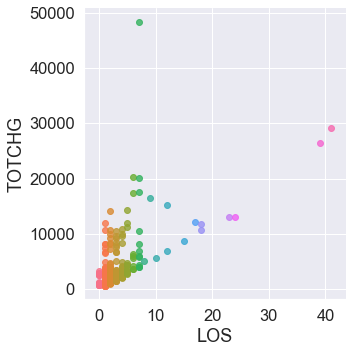

In [45]:
sns.lmplot( x="LOS", y="TOTCHG", data=Data_los_totchg, fit_reg=False, hue='LOS', legend=False)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')
#sns.plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


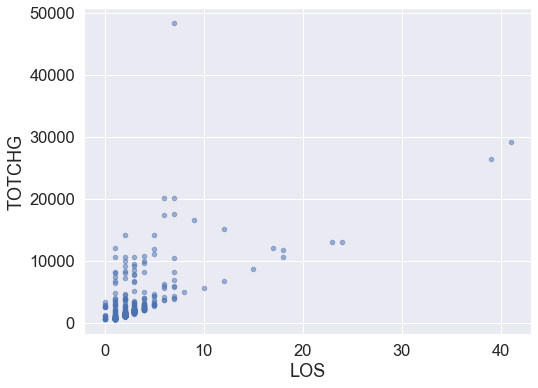

In [46]:
#OR:
# Lets see the distribution of the variation of LOS with TOTCHG without regression line.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Pandas scatter plot
Data_los_totchg.plot(kind='scatter', x='LOS', y='TOTCHG', alpha=0.5)

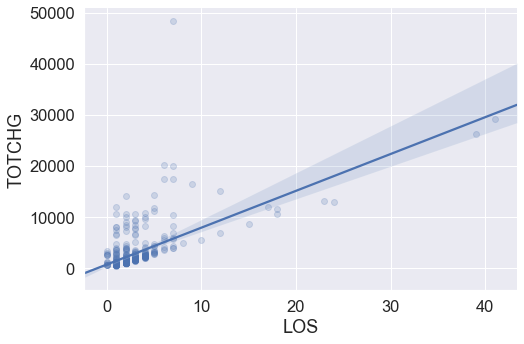

In [47]:
# Seaborn scatter plot with regression line
sns.lmplot(x='LOS', y='TOTCHG', data=Data_los_totchg, aspect=1.5, scatter_kws={'alpha':0.2})

We can see many outliers in the above scatter plots.

#### Lets check the outliers through box plots:

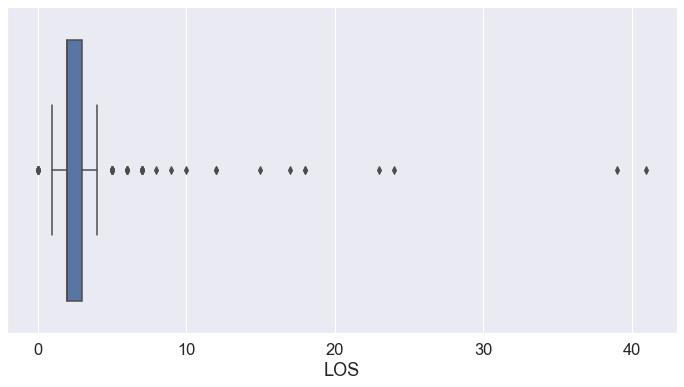

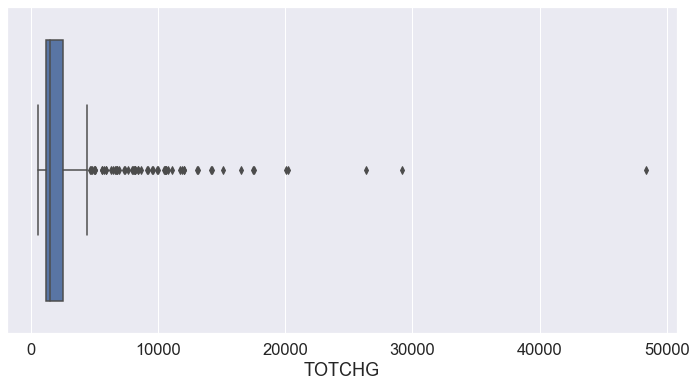

In [48]:
num_features=['LOS', 'TOTCHG']
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=Data_los_totchg,ax=ax)

Above box plots shows presence of outliars in both variables: 'LOL', and 'TOTCHG'.

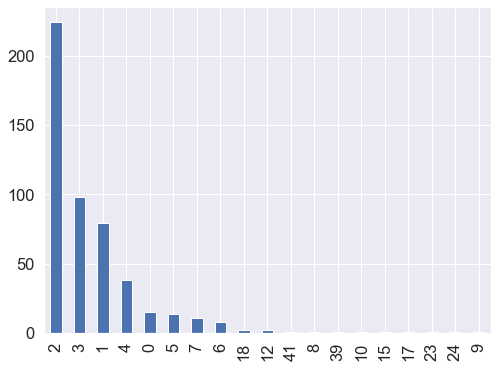

In [49]:
Data_los_totchg['LOS'].value_counts().plot(kind='bar')

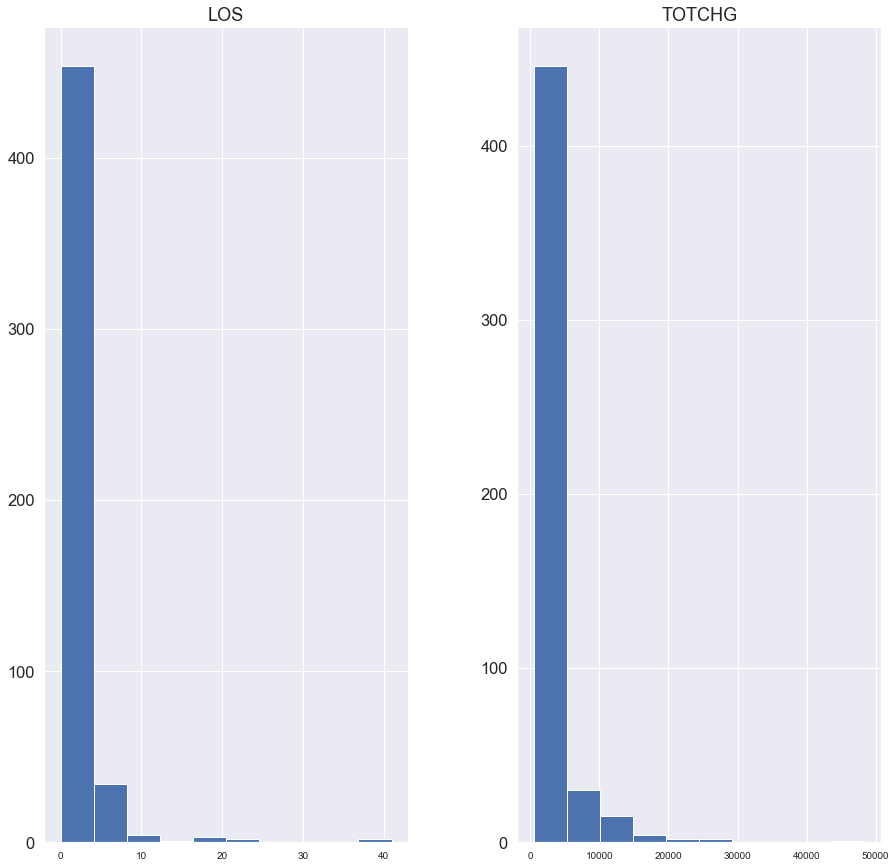

In [50]:
# Histograms:
Data_los_totchg.hist(figsize=(15,15), xlabelsize = 10);

In [51]:
from sklearn.linear_model import LinearRegression
# Using Linear Regression:
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# pair the feature names with the coefficients
list(zip(X_train, linreg.coef_))

[('const', 0.0),
 ('AGE', 140.06899929389832),
 ('GENDER', -592.6878286242884),
 ('LOS', 761.5687231281984),
 ('RACE', -317.23192501317743),
 ('APRDRG', -8.180713151010748)]

In [53]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[ 2918.93956392  2461.73995768   980.75643745  1667.7594031
   219.18771432  4179.4152795    727.64164133  5314.90283739
  1742.32516058  1742.32516058  1573.44426608  1742.32516058
  1742.32516058   980.75643745  1869.05212906   337.73396965
  5001.29859502  1573.44426608  1551.92152211  1573.44426608
  2173.7322671   1742.32516058  1742.32516058  1573.44426608
  1742.32516058  2335.0129892   4016.38647753  4136.0300021
  2842.04026553  5063.57673401  2737.96699887  1038.02142951
  1742.32516058  6076.47156052  1667.44838195  2503.89388371
  5129.32710353  3359.46672271  1573.44426608  3199.07756251
  3030.19666801   980.75643745   811.87554295  1835.83472543
  2033.6632678   1573.44426608  2503.89388371   299.82103107
  1573.44426608  1573.44426608  1573.44426608  2335.0129892
  1856.85514469  4797.3662273   1573.44426608  2503.89388371
  1294.53761886   980.75643745  2227.72437912  1573.44426608
   766.12168068  1218.74051001   219.18771432  1573.44426608
  -319.74247792  3096.58171

In [54]:
from sklearn import metrics
# Model evaluation metrics for regression(degree=1)
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Model Score for Training data: {}".format(linreg.score(X_train,y_train)))
print("Model Score for Testing data(r2 value): {}".format(r2_score(y_test,y_pred)))

y-intercept             :  5603.195161479074
beta coefficients       :  [   0.          140.06899929 -592.68782862  761.56872313 -317.23192501
   -8.18071315]
Mean Abs Error   MAE    :  1016.6221186143708
Mean Sq  Error MSE      :  4255400.0896719955
Root Mean Sq Error RMSE :  2062.8621111630305
Model Score for Training data: 0.5358135633410471
Model Score for Testing data(r2 value): 0.6369141179340148


This model comparatively shows the underfitting. We can solve this problem by adding more features or more parameters, both of these expand the hypothesis space. 


#### I standardized the data using RobustScaler first and checked  again the effects of outliars and model accuracies, but I found again the low performance of the model. Furthermore, I applied both StandardScaler and MinMaxScaler and checked the model performance. These two Scalers also couldn't enhance the  model performance. 

 #### I further applied the IQR(Inter Quartile Range) method to remove the outliars and measured the model performances.But still model performance could not be enhanced. 


The linear coefficint of 'LOS' is higher as compared to other variables.We can write the following linear equation to know the relation of this most significant variable 'LOS' with the hospital costs:
    
y = m1x1 + C1 

'TOTCHG' = 762 * 'LOS' + 846 

This equation implies that one unit increase of length of stay of patient at hospital increases the total hospital costs by 762.



In [76]:
import statsmodels.formula.api as smf
model_f = 'TOTCHG ~ LOS'

model = smf.ols(formula=model_f, data=Data_los_totchg)
lmod = model.fit()

In [77]:
# fitted values (need a constant term for intercept)
model_fitted_y = lmod.fittedvalues

# model residuals
model_residuals = lmod.resid

# normalized residuals
model_norm_residuals = lmod.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lmod.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lmod.get_influence().cooks_distance[0]

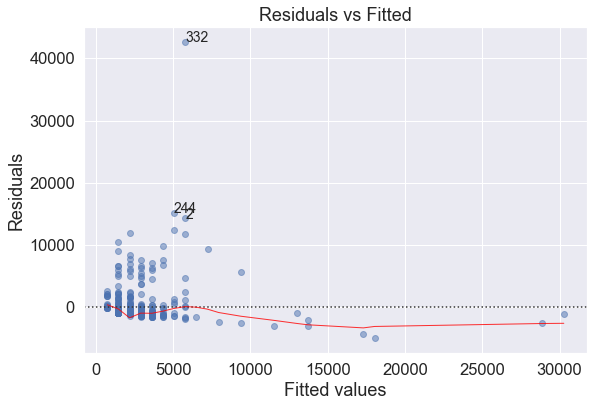

In [78]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(6)
plot_lm_1.set_figwidth(9)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'TOTCHG', data=Data_los_totchg, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

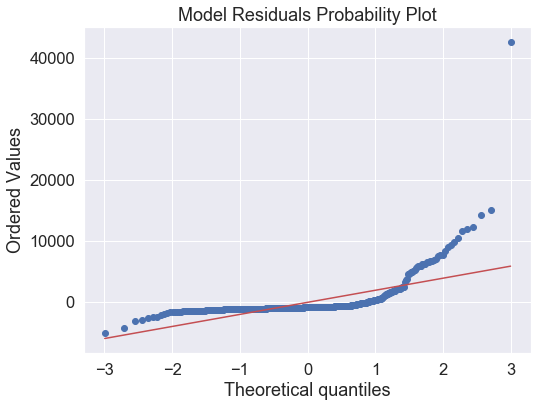

In [84]:
from scipy import stats
stats.probplot(lmod.resid, plot= plt)
plt.title("Model Residuals Probability Plot");

### Lets see the prediction of length of stay ('LOS') of patient from age, gender, and race.  

In [55]:
data_l=data.copy()
data_l


,AGE,GENDER,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
5,17,0,0,1.0,3305,347
6,17,1,4,1.0,2205,754
7,16,1,2,1.0,1167,754
8,16,1,1,1.0,532,753
9,17,1,2,1.0,1363,758


In [56]:
data_los=data_l[['AGE','GENDER','LOS','RACE']]
data_los

,AGE,GENDER,LOS,RACE
0,17,1,2,1.0
1,17,0,2,1.0
2,17,1,7,1.0
3,17,1,1,1.0
4,17,1,1,1.0
5,17,0,0,1.0
6,17,1,4,1.0
7,16,1,2,1.0
8,16,1,1,1.0
9,17,1,2,1.0


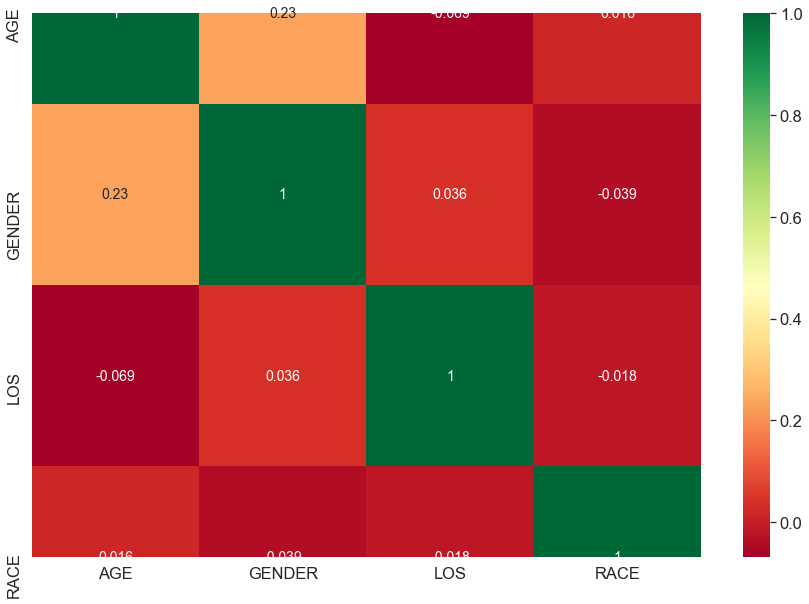

In [89]:
# Generating the correlation heat-map
corrmat=data_los.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,10))
sns.heatmap( data_los[top_corr_features].corr(),annot=True,cmap="RdYlGn");

heatmap shows that non of these variables are correlated with the response variable 'LOS'. However, lets set up the model and see its performance:

In [57]:
X_features=data_los.drop(['LOS'],axis=1)
y_actual=data_los['LOS']
X_features

,AGE,GENDER,RACE
0,17,1,1.0
1,17,0,1.0
2,17,1,1.0
3,17,1,1.0
4,17,1,1.0
5,17,0,1.0
6,17,1,1.0
7,16,1,1.0
8,16,1,1.0
9,17,1,1.0


In [58]:
# Import libraries for model validation:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
# Splitting data:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_features,y_actual,test_size=0.20,random_state=101)

In [59]:
print("X_train shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test shape {} and size {}".format(y_test2.shape,y_test2.size))

X_train shape (400, 3) and size 1200
X_test shape (100, 3) and size 300
y_train shape (400,) and size 400
y_test shape (100,) and size 100


In [60]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train2) ## let's add an intercept (beta_0) to our model

X_test2    = sm.add_constant(X_test2)

lm = sm.OLS(y_train2,X_train2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.372
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.251
Time:                        20:45:17   Log-Likelihood:                -1032.2
No. Observations:                 400   AIC:                             2072.
Df Residuals:                     396   BIC:                             2088.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8888      0.455      6.348      0.000       1.994       3.784
AGE           -0.0382      0.024     -1.567      0.118      -0.086       0.010
GENDER         0.5254      0.334      1.575      0.116      -0.130       1.181
RACE          -0.1299      0.353     -0.368      0.713      -0.824       0.564
==============================================================================
Omnibus:                      530.683   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59541.186
Skew:                           6.502   Prob(JB):                         0.00
Kurtosis:                      61.338   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Non of the mentioned predictors are statistically significant for the response variable 'LOS'. Therefore, the prediction of length of stay from predictors 'AGE','GENDER', and 'RACE' is not insightful.
However, it is possible to predict the length of stay by adding other significant variables. 